#### **AIRLINE PASSENGERS USING NEURAL PROPHET**

In [15]:
## importting neccessary librariees  
import numpy as np  
import pandas as pd 
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error
from prophet import Prophet
from neuralprophet import NeuralProphet
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

#### **loading the dataset**

In [2]:
## the dataset  
dataset_df = pd.read_csv(r"d:\Tong123\DS\airline_passengers.csv")
## first five  
dataset_df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### **preparing the data for prophet**

In [3]:
## preparing the data for prophet  
dataset_df['ds'] = pd.to_datetime(dataset_df['Month'])
dataset_df['y'] = dataset_df['Passengers']
dataset_df = dataset_df[['ds','y']]


In [4]:
dataset_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


#### **Creating the first Model: Neural Prophet**

In [5]:
## creating the first model  
m1 = NeuralProphet(learning_rate=0.01)
## fit the model 
metrics_train = m1.fit(df=dataset_df,freq="MS")
## creating the future datafraame  
future_m1 = m1.make_future_dataframe(df=dataset_df,periods=12,n_historic_predictions=True)
## makee predictions 
forecast_m1 = m1.predict(future_m1)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


#### **plots**

In [ ]:
## the forecast plot  
m1.plot(fcst=forecast_m1,plotting_backened="plotly-static")

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '6a0ed908-78bb-48e4-a2cc-8dee7d3211a0',
              'x': array([datetime.datetime(1949, 1, 1, 0, 0),
                          datetime.datetime(1949, 2, 1, 0, 0),
                          datetime.datetime(1949, 3, 1, 0, 0),
                          datetime.datetime(1949, 4, 1, 0, 0),
                          datetime.datetime(1949, 5, 1, 0, 0),
                          datetime.datetime(1949, 6, 1, 0, 0),
                          datetime.datetime(1949, 7, 1, 0, 0),
                          datetime.datetime(1949, 8, 1, 0, 0),
                          datetime.datetime(1949, 9, 1, 0, 0),
                          datetime.datetime(1949, 10, 1, 0, 0),
                          datetime.datetime(1949, 11, 1, 0, 0),
                       

In [ ]:
### ploting the components 
m1.plot_parameters(plotting_backend="plotly-static")

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'dc1d4038-c495-422c-856e-4a7d509ea07d',
              'x': array([datetime.datetime(1949, 1, 1, 0, 0),
                          datetime.datetime(1949, 2, 1, 0, 0),
                          datetime.datetime(1949, 3, 1, 0, 0),
                          datetime.datetime(1949, 4, 1, 0, 0),
                          datetime.datetime(1949, 5, 1, 0, 0),
                          datetime.datetime(1949, 6, 1, 0, 0),
                          datetime.datetime(1949, 7, 1, 0, 0),
                          datetime.datetime(1949, 8, 1, 0, 0),
                          datetime.datetime(1949, 9, 1, 0, 0),
                          datetime.datetime(1949, 10, 1, 0, 0),
                          datetime.datetime(1949, 11, 1, 0, 0),
                          datetime.date

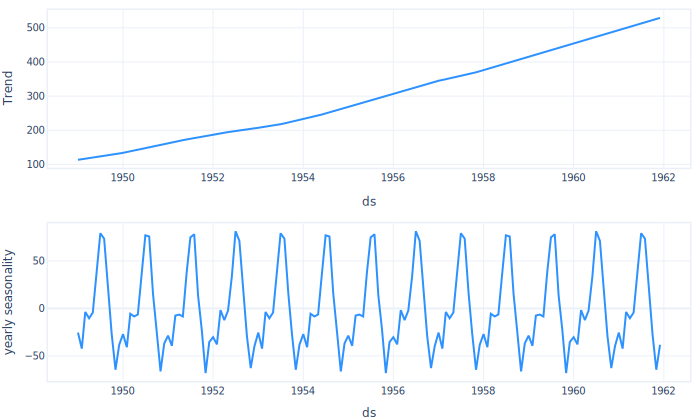

In [12]:
## plot the components of the time series  
m1.plot_components(fcst=forecast_m1,plotting_backend="plotly-static")

#### **Model 2 is Prophet Basic**

08:17:46 - cmdstanpy - INFO - Chain [1] start processing
08:17:48 - cmdstanpy - INFO - Chain [1] done processing


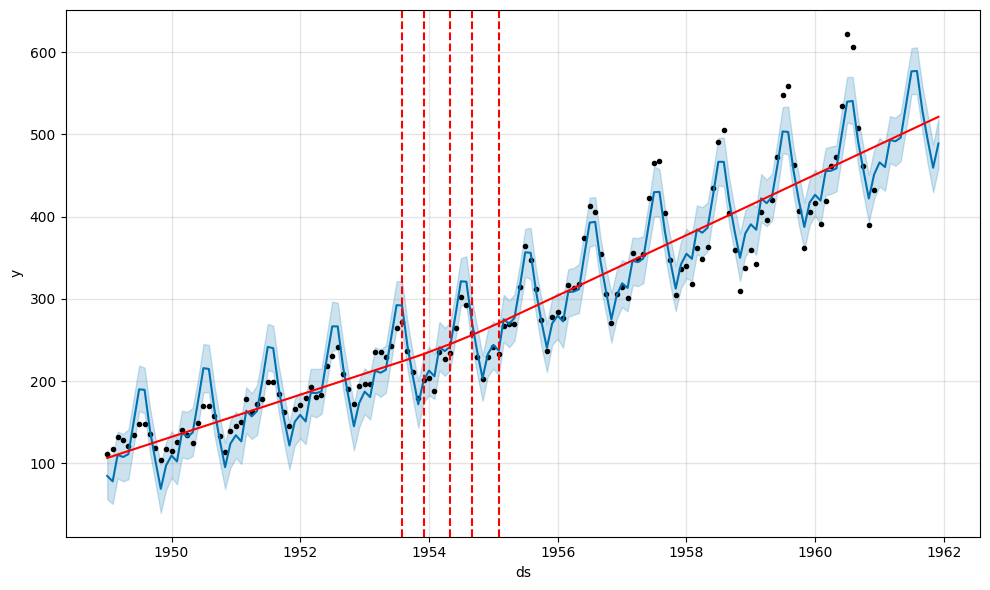

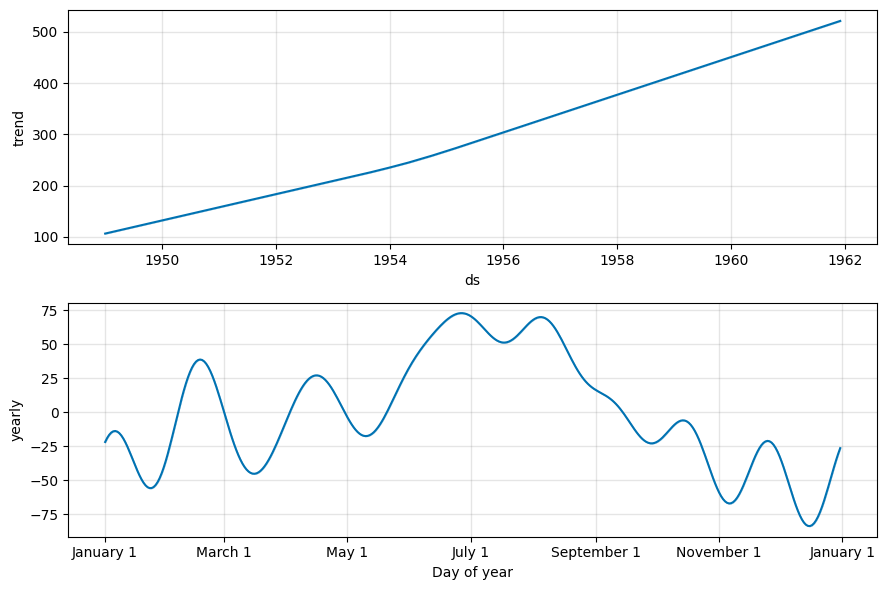

In [10]:
#### Defualt prophet Model   
m2 = Prophet()
## fit the model  
m2.fit(df=dataset_df)
## make the futre 2 dataframe  
future_2 = m2.make_future_dataframe(periods=12,freq="MS")
## make forecast df  
forecast_m2 = m2.predict(future_2)
## plot the forecast  
fig = m2.plot(fcst=forecast_m2)
## add change points to the plot  
a = add_changepoints_to_plot(fig.gca(),m=m2,fcst=forecast_m2)
## plot the componentts 
fig_components = m2.plot_components(fcst=forecast_m2)

#### **Model 3 is prophet Tunned**

08:22:54 - cmdstanpy - INFO - Chain [1] start processing
08:22:54 - cmdstanpy - INFO - Chain [1] done processing


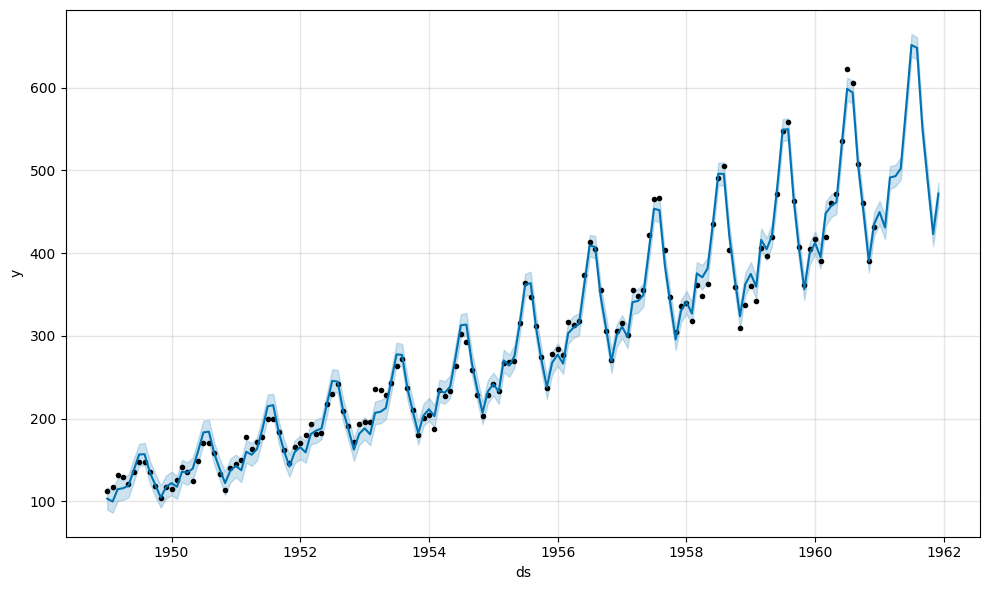

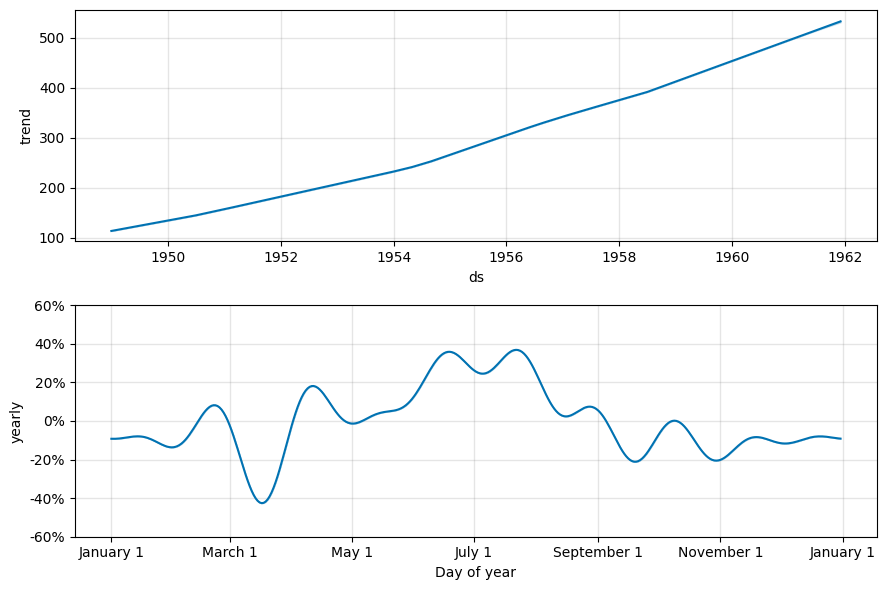

In [11]:
## Model 3 is tunned version of prophet  
m3 = Prophet( 
    changepoint_prior_scale=0.05, 
    changepoint_range=0.8, 
    seasonality_mode="multiplicative", 
    seasonality_prior_scale=10
)
## fit the model   
m3.fit(df=dataset_df)
## make tthe future dataframe  
future_m3 = m3.make_future_dataframe(periods=12,freq="MS")
## make the forecast  
forecast_m3 = m3.predict(future_m3)
## plot the forecast  
fig3 = m3.plot(fcst=forecast_m3)
## add changepoints to plot  
a = add_changepoints_to_plot(fig.gca(),m=m3,fcst=forecast_m3)
## plot components  
fig3_comp = m3.plot_components(fcst=forecast_m3)

### **plotting the residuals for m3**

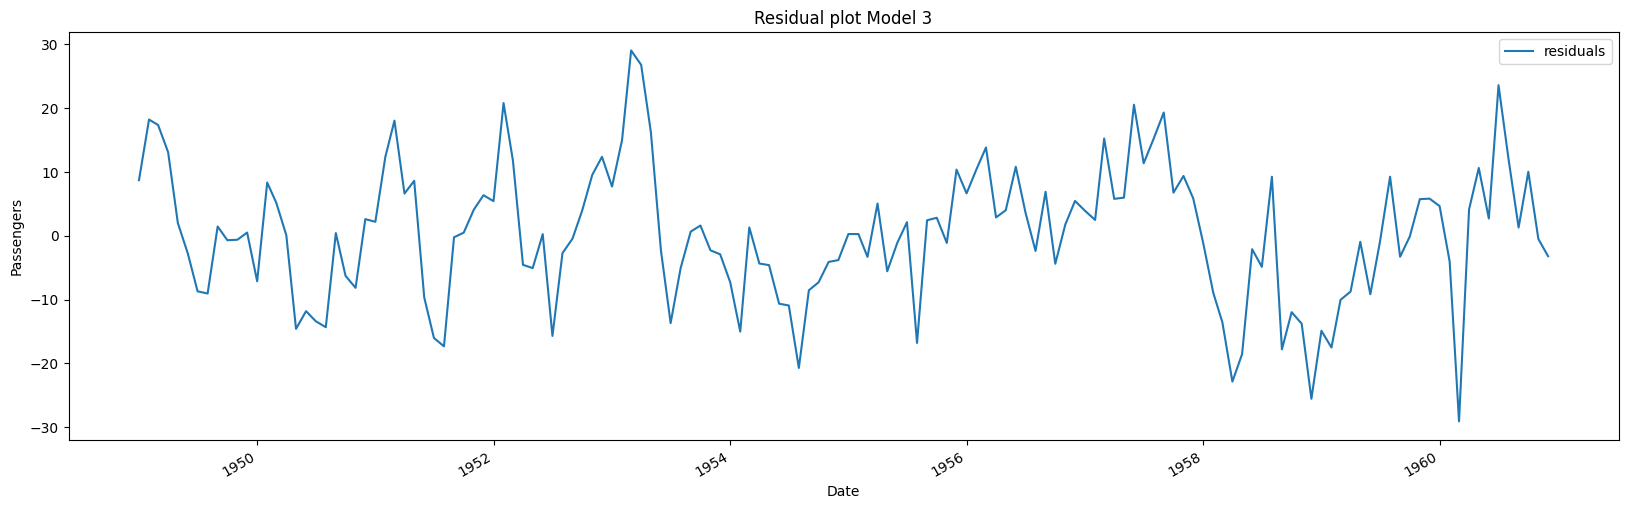

In [16]:
## plotting the  residual for m3  
residual_df = pd.DataFrame({
    "ds":dataset_df['ds'], 
    "residuals":dataset_df['y'] - forecast_m3['yhat']
})
## plot  
residual_df.plot(x="ds",y='residuals',figsize=(20,6),title="Residual plot Model 3",xlabel="Date",ylabel="Passengers")
plt.show()

#### **Model 4 is is Tunned Neural Prophet**

In [17]:
## Model 4 is Tunned Neural Prophet
m4 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    quantiles=None, 
    learning_rate=0.01

)

## fit the model  
metrics_4 = m4.fit(df=dataset_df,freq="MS")
## make the future dataframe     
future_m4 = m4.make_future_dataframe(df=dataset_df,periods=12,n_historic_predictions=True)
## make the forecast  
forecast_m4 = m4.predict(future_m4)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


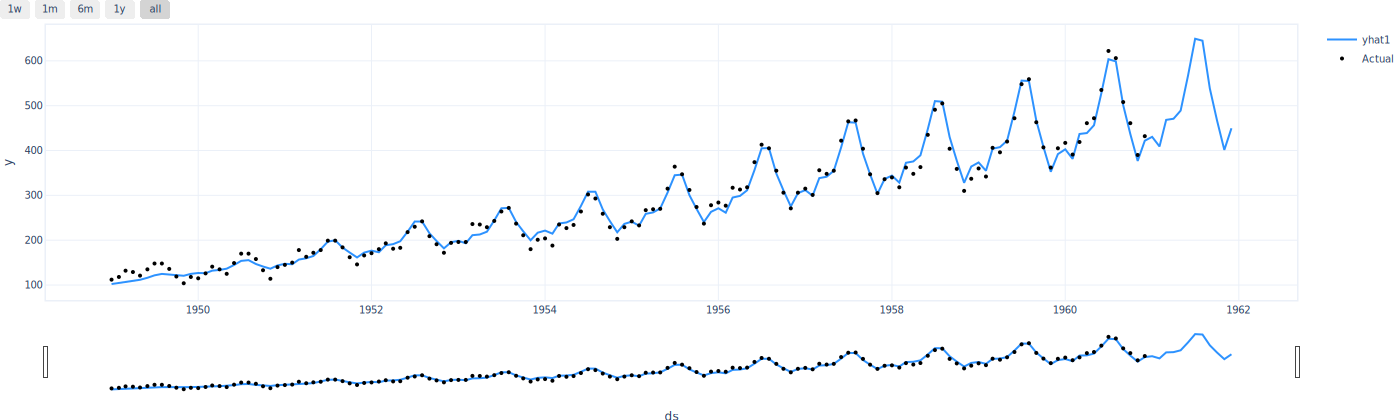

In [20]:
## plotss  
m4.plot(fcst=forecast_m4,plotting_backend="plotly-static",figsize=(20,6))

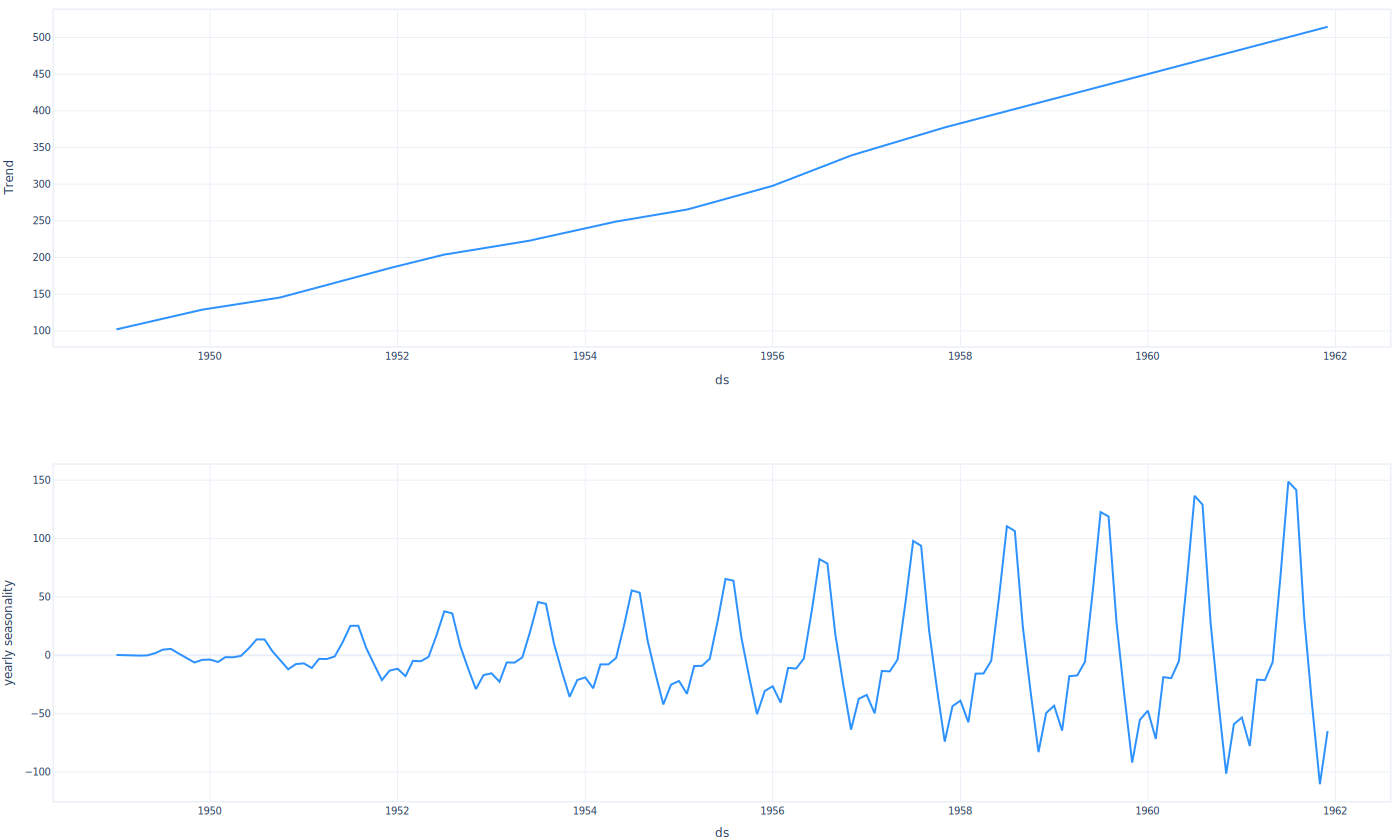

In [21]:
## componets plot  
m4.plot_components(fcst=forecast_m4,plotting_backend="plotly-static",figsize=(20,6))

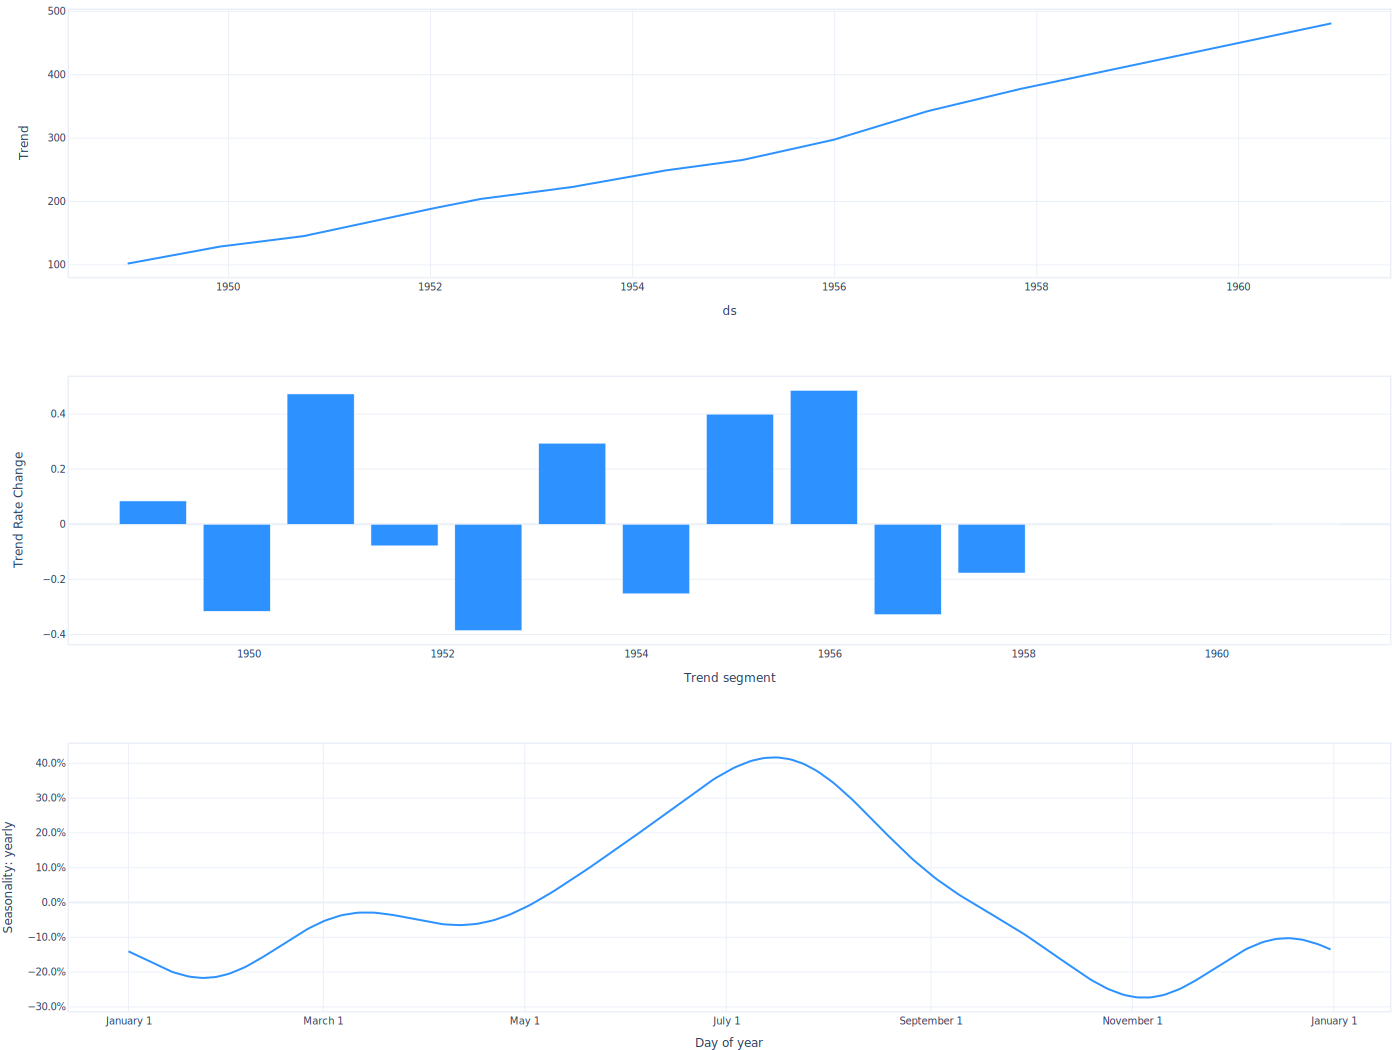

In [23]:
## plot the parameters  
m4.plot_parameters(plotting_backend="plotly-static",figsize=(20,5))

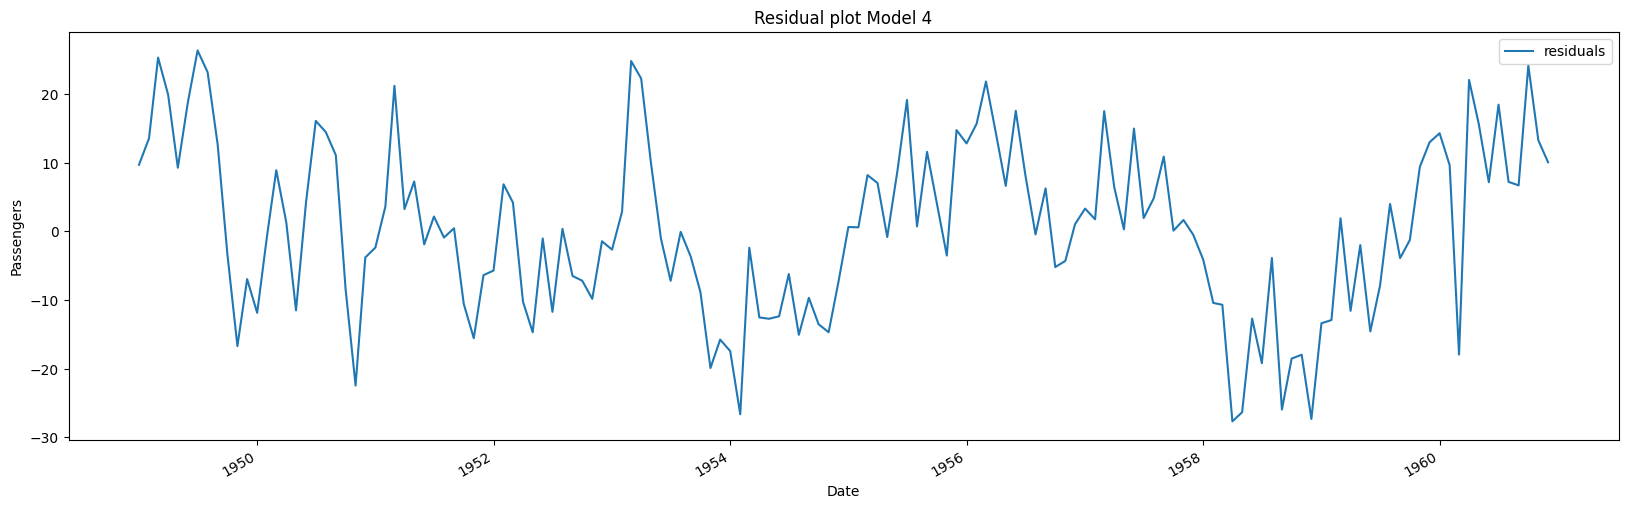

In [25]:
## residual plot  

## plotting the  residual for m3  
residual_df = pd.DataFrame({
    "ds":dataset_df['ds'], 
    "residuals":dataset_df['y'] - forecast_m4['yhat1']
})
## plot  
residual_df.plot(x="ds",y='residuals',figsize=(20,6),title="Residual plot Model 4",xlabel="Date",ylabel="Passengers")
plt.show()

##### **Model 5 is Neural Prophet with  Auto Regressive Component in a Neural Network fashion**

In [34]:
## Model 5 
m5 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    learning_rate=0.01, 
    drop_missing=True, 
    n_lags=14,  
    ar_layers=[64,32,16]

)
## fit the model 
metrics_m5 = m5.fit(df=dataset_df,freq="MS")
## make the future datafrrame  
future_m5  = m5.make_future_dataframe(df=dataset_df,periods=12,n_historic_predictions=True)
## make the forecast  
forecast_m5 = m5.predict(future_m5)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.31]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.31]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


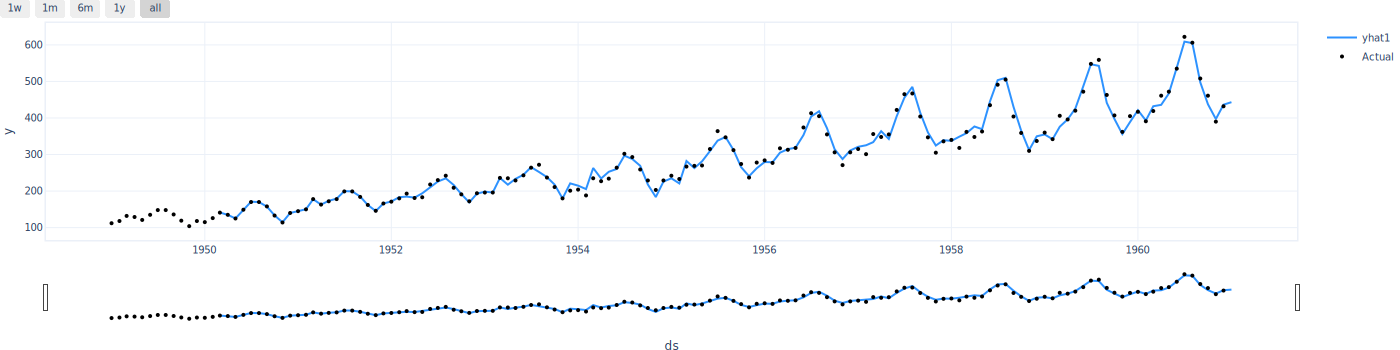

In [37]:
## plots 
m5.plot(fcst=forecast_m5,plotting_backend="plotly-static",figsize=(20,5))

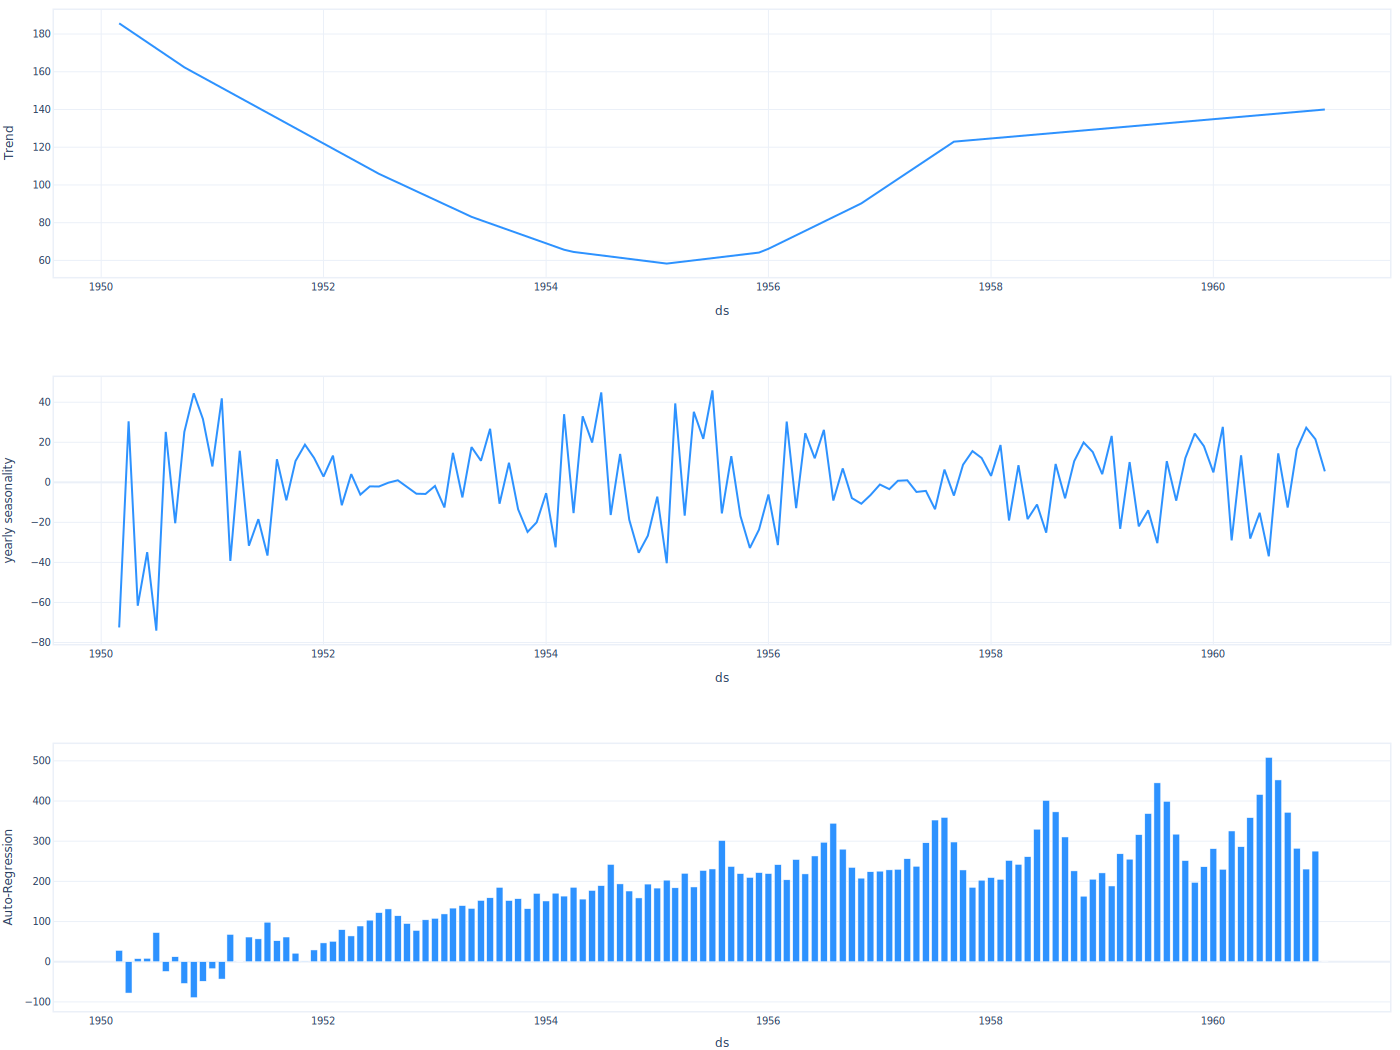

In [38]:
## componets   
m5.plot_components(fcst=forecast_m5,plotting_backend="plotly-static",figsize=(20,5))

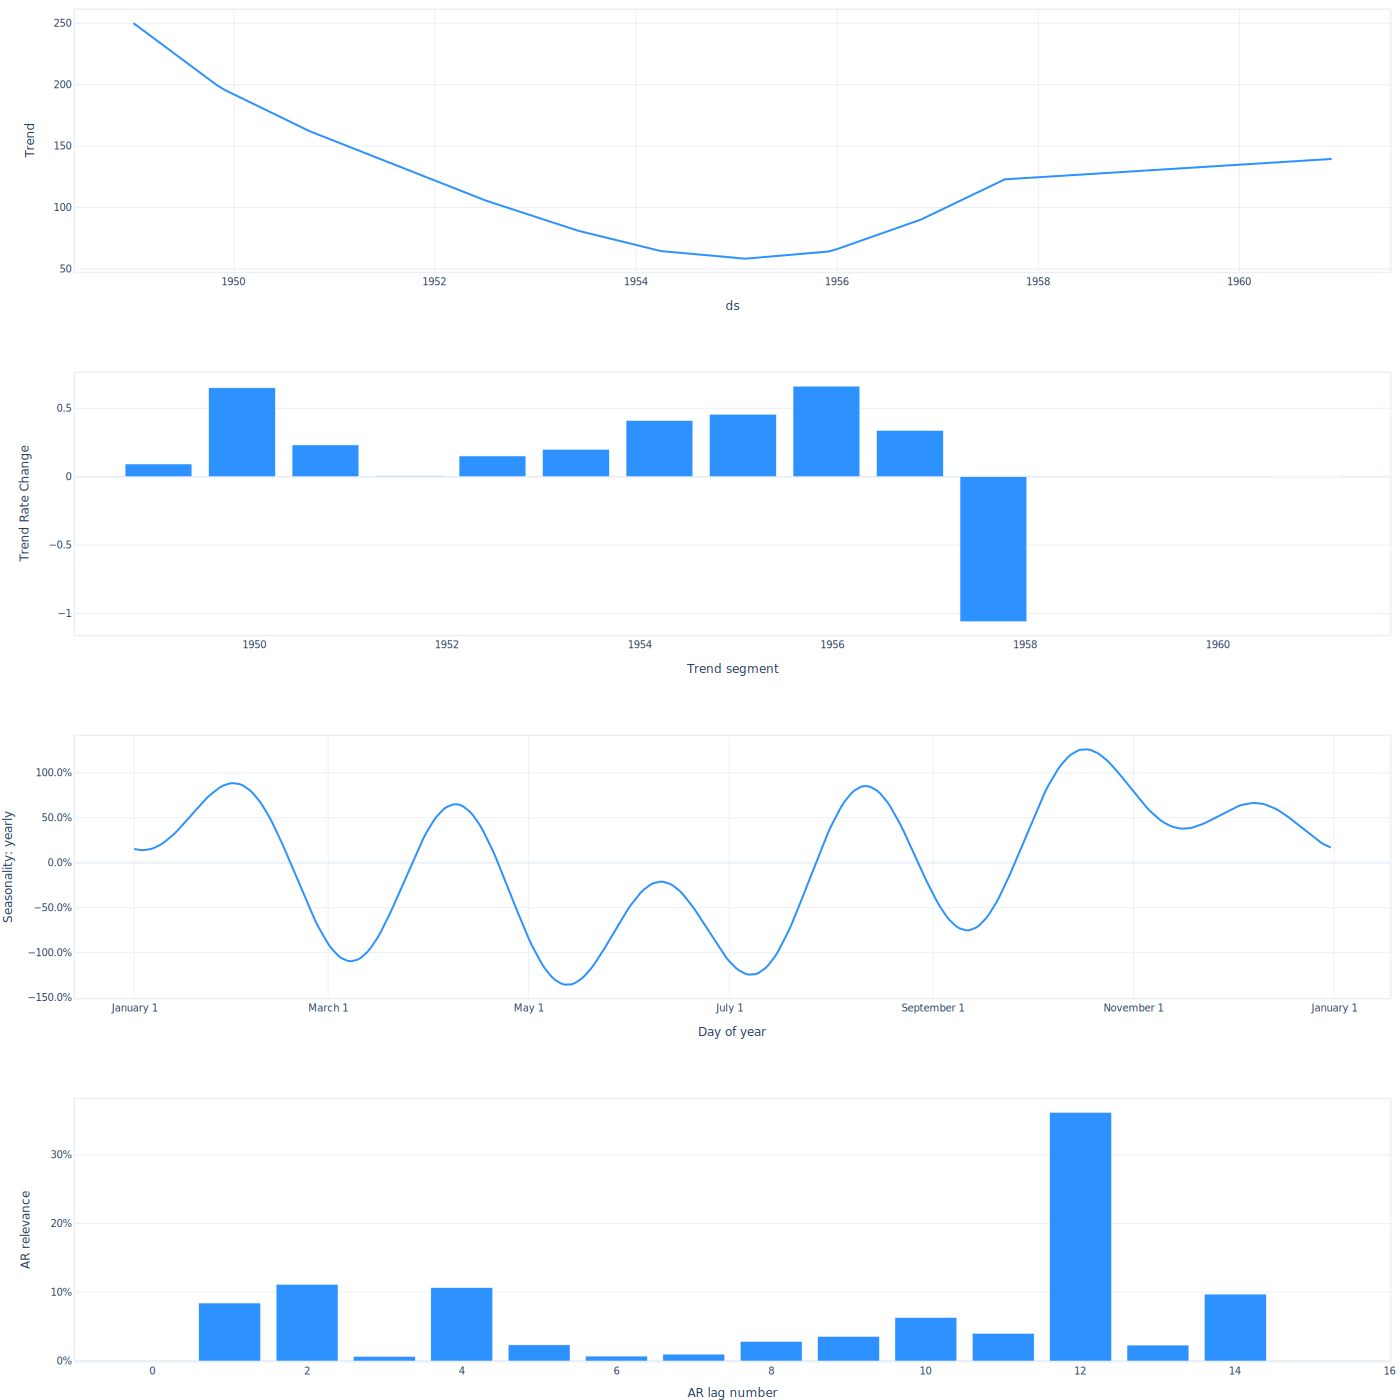

In [39]:
## plot the parameteers  
m5.plot_parameters(plotting_backend="plotly-static",figsize=(20,5))

### **plot the residual plot**

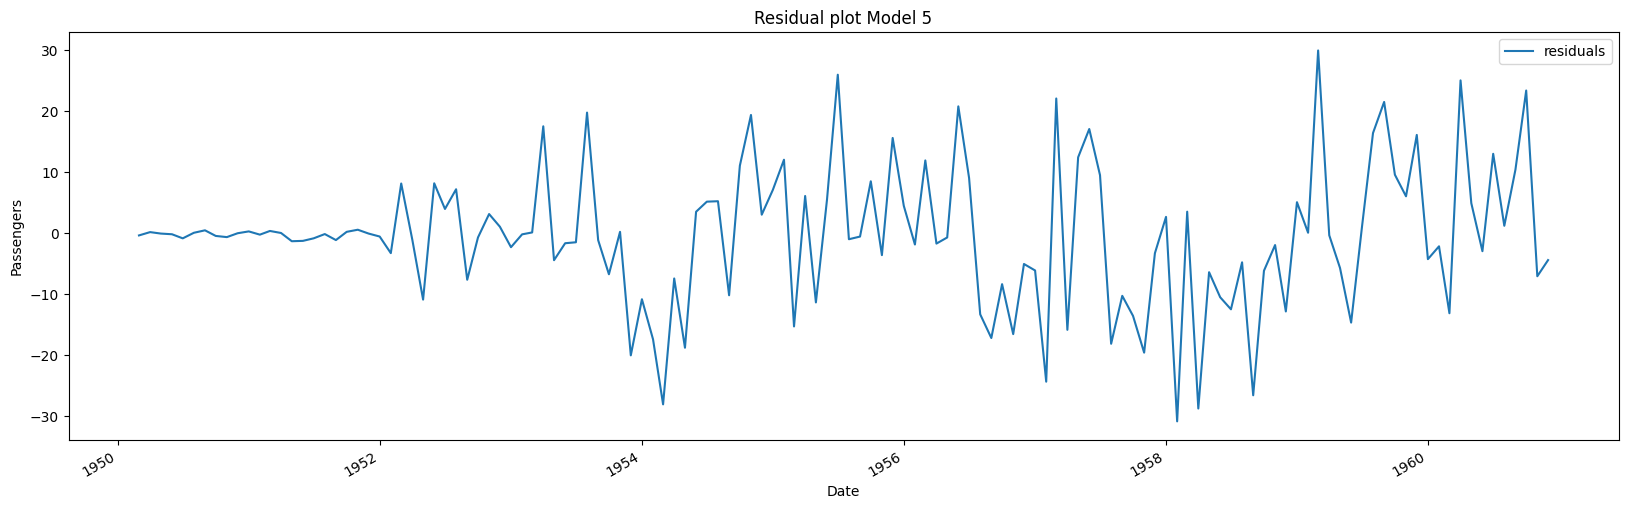

In [36]:
## residual plot  

## plotting the  residual for m3  
residual_df = pd.DataFrame({
    "ds":dataset_df['ds'], 
    "residuals":dataset_df['y'] - forecast_m5['yhat1']
})
## plot  
residual_df.plot(x="ds",y='residuals',figsize=(20,6),title="Residual plot Model 5",xlabel="Date",ylabel="Passengers")
plt.show()

### **Model 6 is Neural Prophet with AR-net and Events**

In [ ]:
## Defining the event as new year 
df_event = pd.DataFrame({ 
    "event":"new_year", 
    "ds":pd.date_range(start=dataset_df['ds'].min(),end= dataset_df['ds'].max(),freq="YS")
})
## show the events
df_event

,event,ds
0,new_year,1949-01-01
1,new_year,1950-01-01
2,new_year,1951-01-01
3,new_year,1952-01-01
4,new_year,1953-01-01
5,new_year,1954-01-01
6,new_year,1955-01-01
7,new_year,1956-01-01
8,new_year,1957-01-01
9,new_year,1958-01-01


In [42]:
## putting it into the dataset df  
dataset_df['new_year'] = dataset_df['ds'].isin(df_event['ds']).astype(int)
dataset_df

,ds,y,new_year
0,1949-01-01,112,1
1,1949-02-01,118,0
2,1949-03-01,132,0
3,1949-04-01,129,0
4,1949-05-01,121,0
...,...,...,...
139,1960-08-01,606,0
140,1960-09-01,508,0
141,1960-10-01,461,0
142,1960-11-01,390,0


In [62]:
## m6 
m6 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False, 
    changepoints_range=0.8, 
    trend_reg=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    learning_rate=0.01, 
    drop_missing=True, 
    n_lags=12,
    ar_layers=[16]
    

)
## add the event to the model  
m6 = m6.add_events('new_year')
## add country holidays  
m6 = m6.add_country_holidays("US")
## fit the model 
metrics_m6 = m6.fit(df=dataset_df,freq="MS")
## make the future datafrrame  
future_m6 = m6.make_future_dataframe(df=dataset_df,periods=12,n_historic_predictions=True)
## add the event to the future 6 df f 
future_m6['new_year'] = future_m6['ds'].isin(df_event['ds']).astype(int)
## make the forecast  
forecast_m6 = m6.predict(future_m6)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Future values not supplied for user specified events. All events being treated as not occurring in future
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.31]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.31]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the

Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


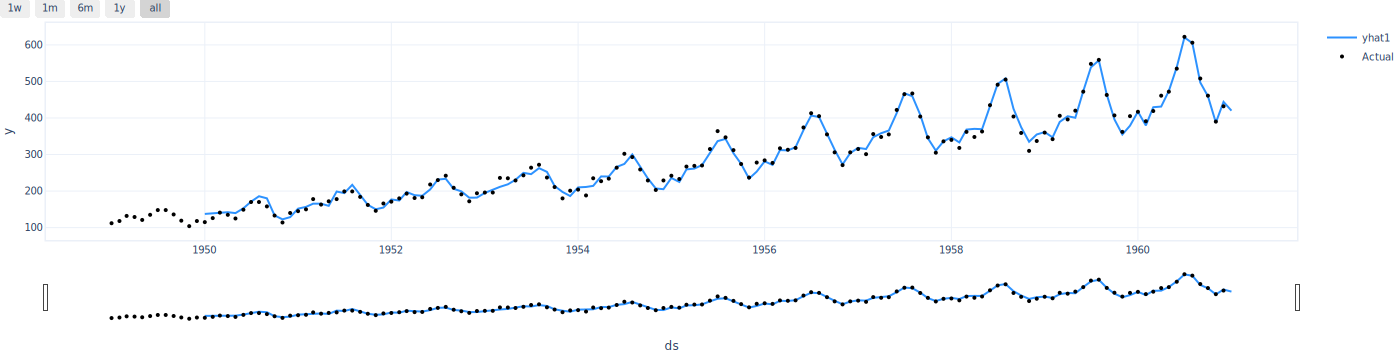

In [64]:
## plot thee components  
m6.plot(fcst=forecast_m6,plotting_backend="plotly-static",figsize=(20,5))

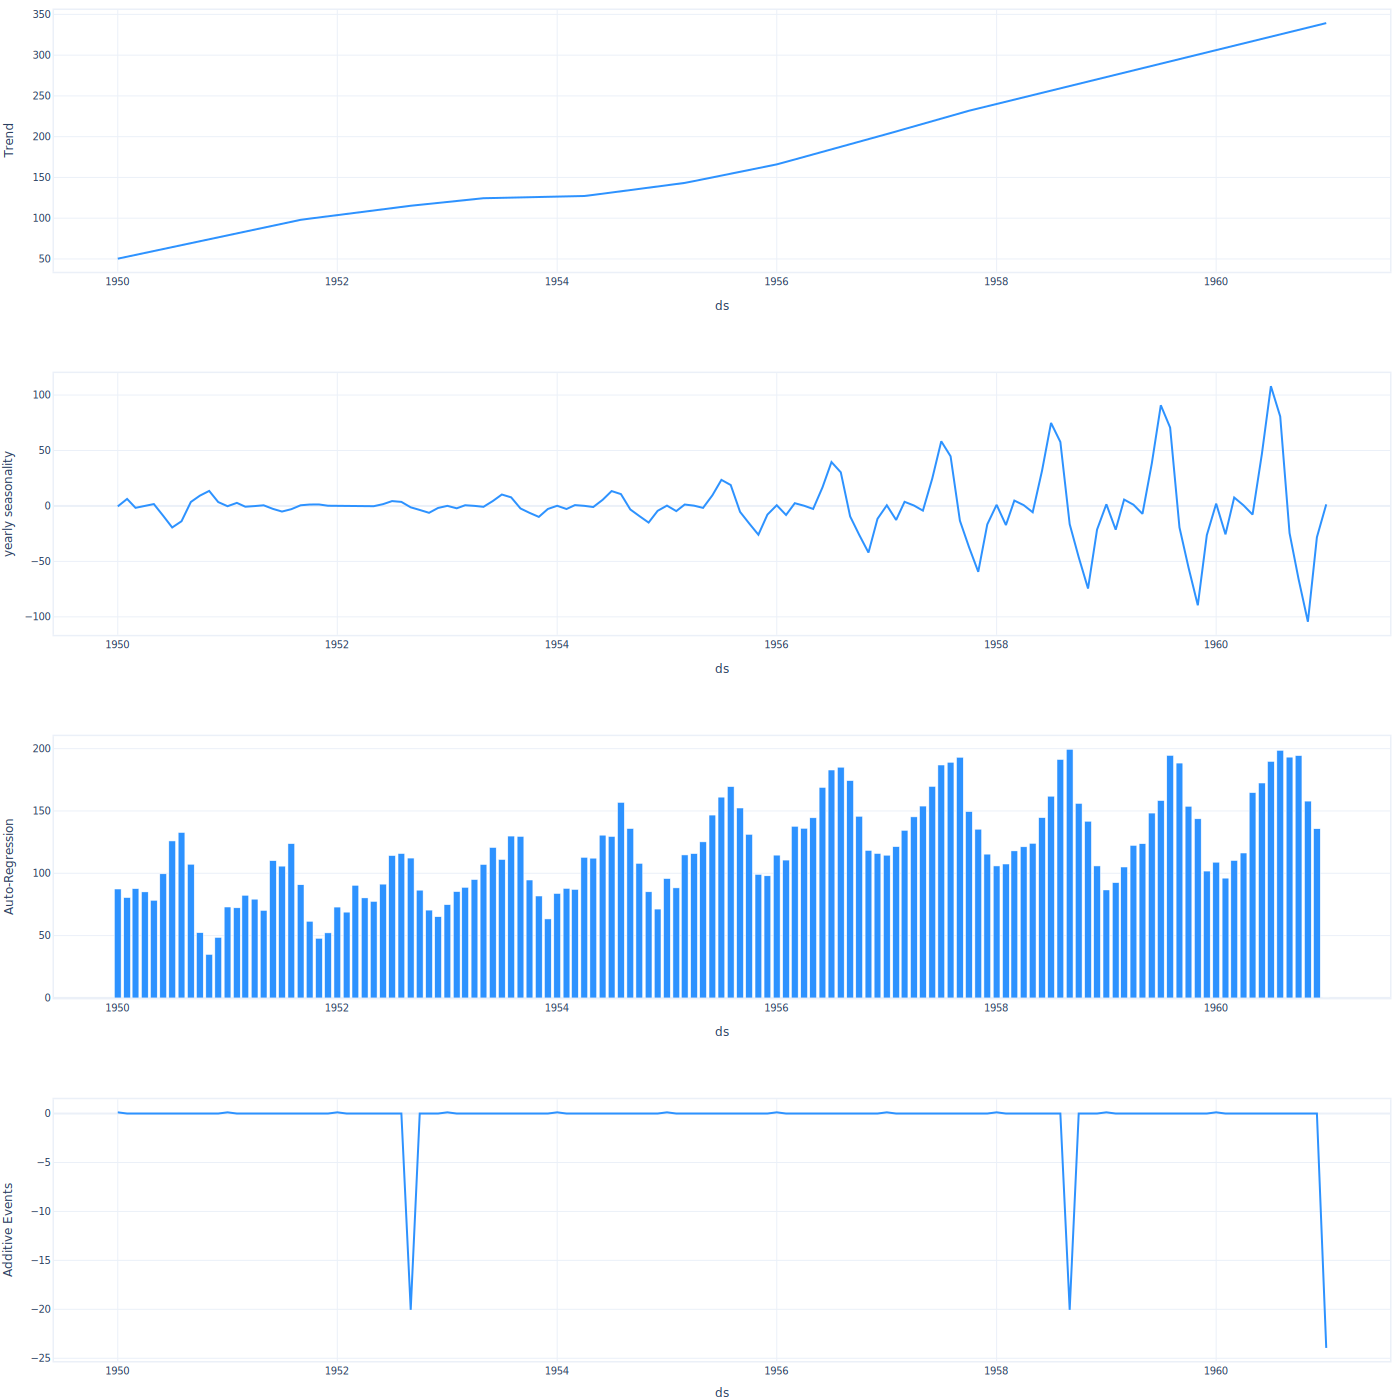

In [65]:
## plot the componets  
m6.plot_components(fcst=forecast_m6,plotting_backend="plotly-static",figsize=(20,5))

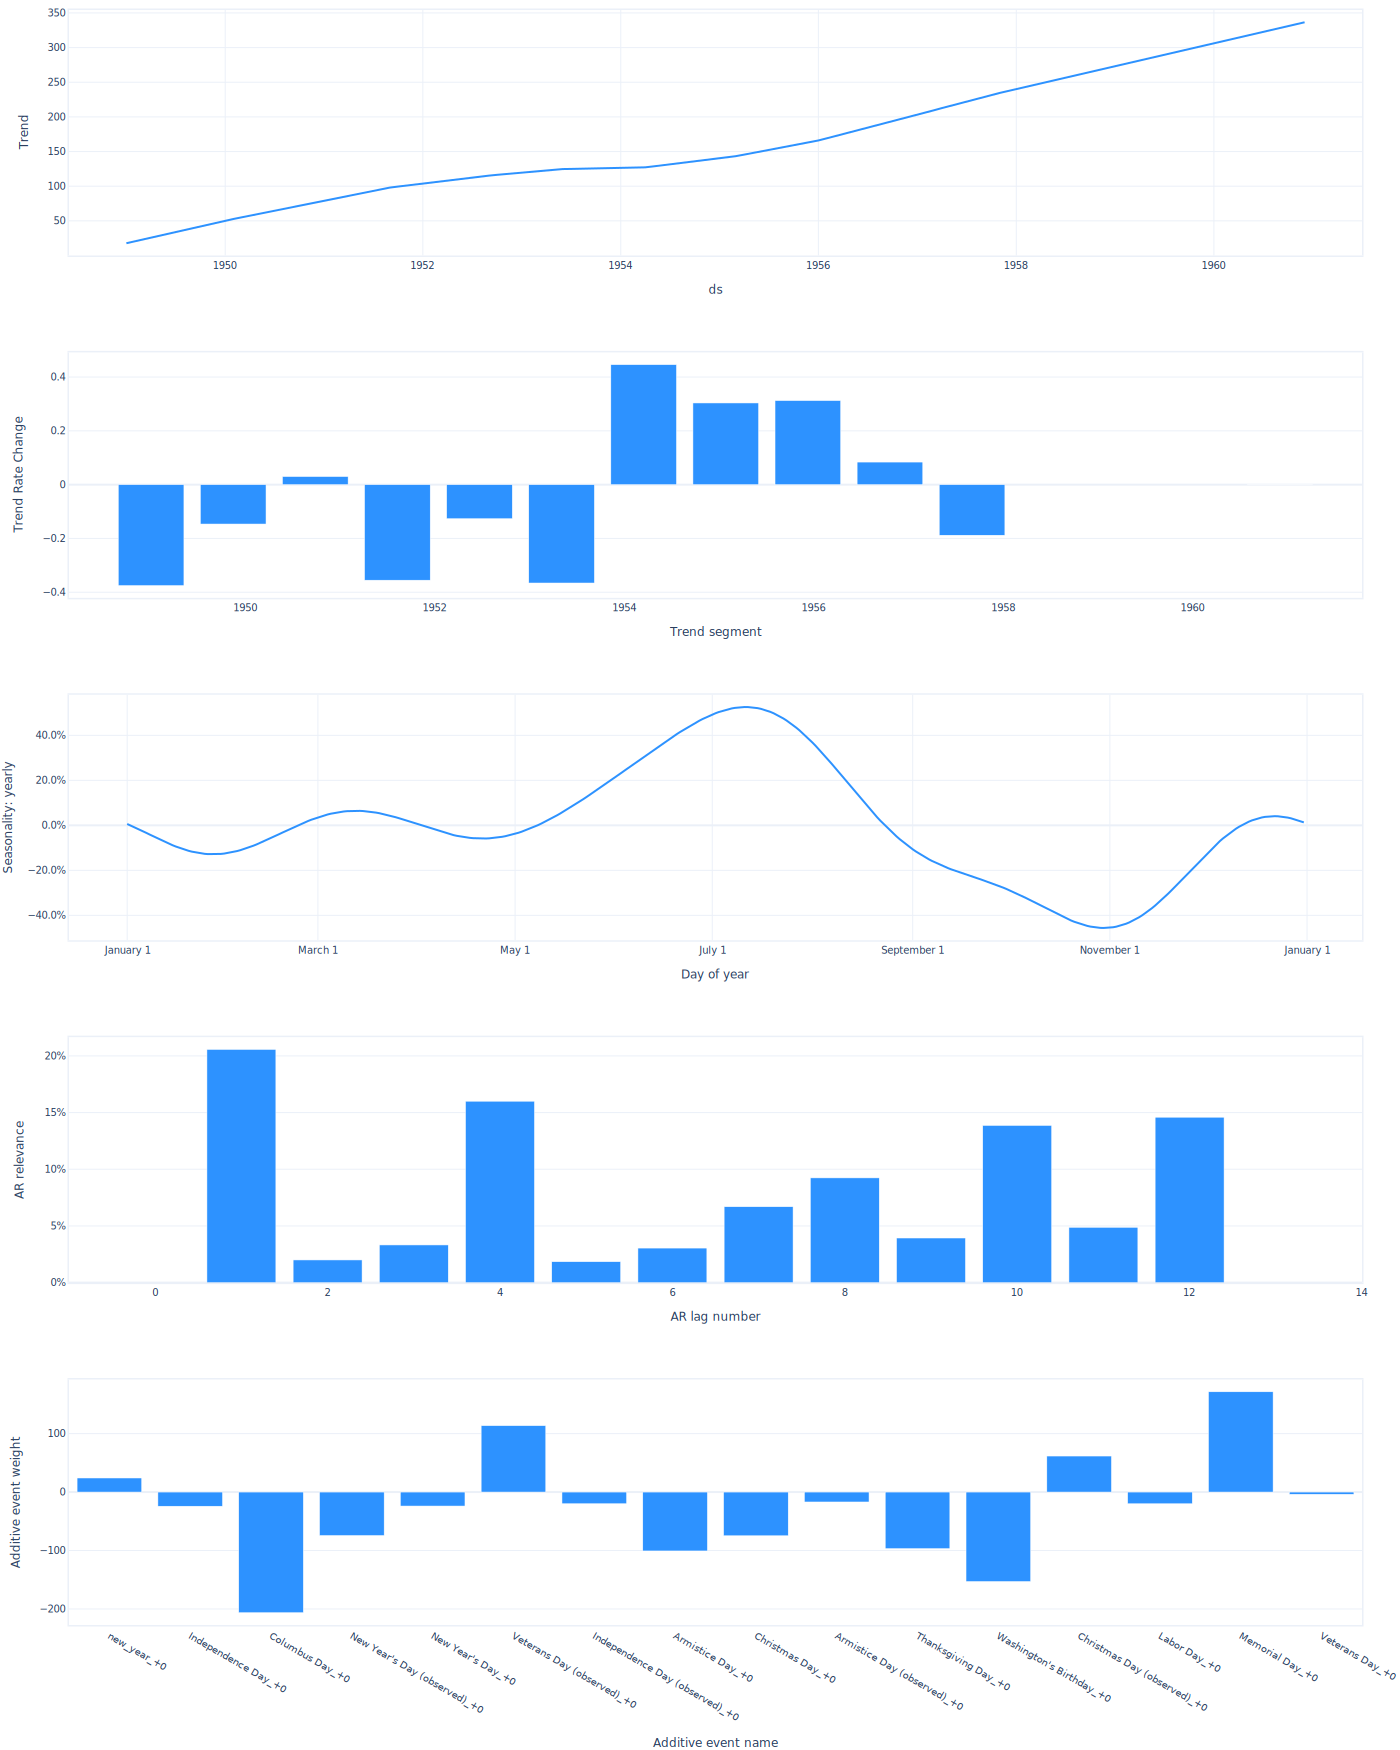

In [66]:
## plot the eparameters  
m6.plot_parameters(plotting_backend="plotly-static",figsize=(20,5))

### **residual plot for m6**

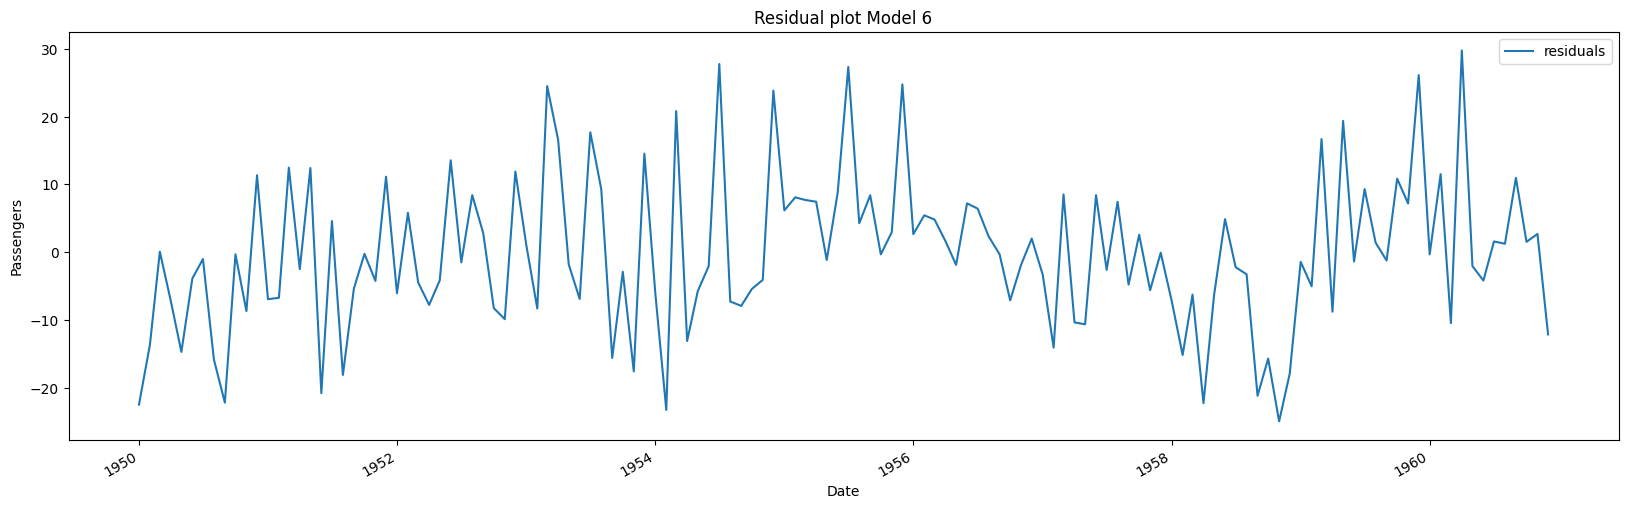

In [63]:
## residual plot  

## plotting the  residual for m3  
residual_df = pd.DataFrame({
    "ds":dataset_df['ds'], 
    "residuals":dataset_df['y'] - forecast_m6['yhat1']
})
## plot  
residual_df.plot(x="ds",y='residuals',figsize=(20,6),title="Residual plot Model 6",xlabel="Date",ylabel="Passengers")
plt.show()

#### **Uncertaintiy (Quantile Rgression and Conforam Predictions)**

In [70]:
## Quantile Regression  
Confidence_level = 0.95 
## lower boundary  
lower_boundary = round((1-Confidence_level)/2,3)
## upper boundary  
upper_boundary = round((Confidence_level + lower_boundary),3)
## qunatles
quantiles = [lower_boundary , upper_boundary]
## print the quantiles  
quantiles

[0.025, 0.975]

In [72]:
## drop new year  
dataset_df.drop(columns='new_year',inplace=True)

In [87]:
## adding quantiles
m1 = NeuralProphet(learning_rate=0.01)
## fit the model 
metrics_train = m1.fit(df=dataset_df,freq="MS")
## creating the future datafraame  
future_m1 = m1.make_future_dataframe(df=dataset_df,periods=12,n_historic_predictions=True)
## makee predictions 
forecast_m1 = m1.predict(future_m1)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.359]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


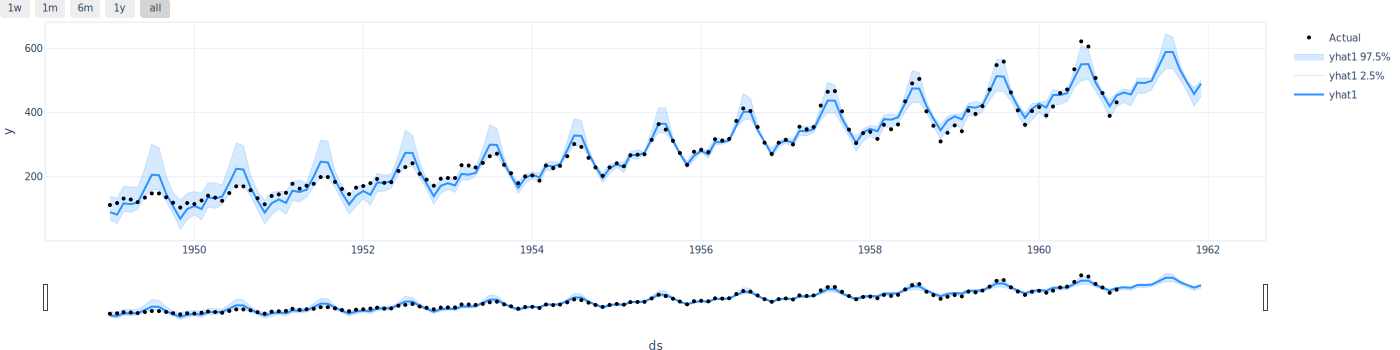

In [77]:
## plot the forecast  
m1.plot(fcst=forecast_m1,plotting_backend="plotly-static",figsize=(20,5))

### **conformal Predictions**

In [88]:
## split the df into train set and the validation set  
train_df , validation_df = m1.split_df(dataset_df,freq="MS",valid_p=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [101]:
## conformal forcasts  
conformal_forecasts = m1.conformal_predict(df=dataset_df,calibration_df=validation_df,method="naive",alpha=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [92.857]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [92.857]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


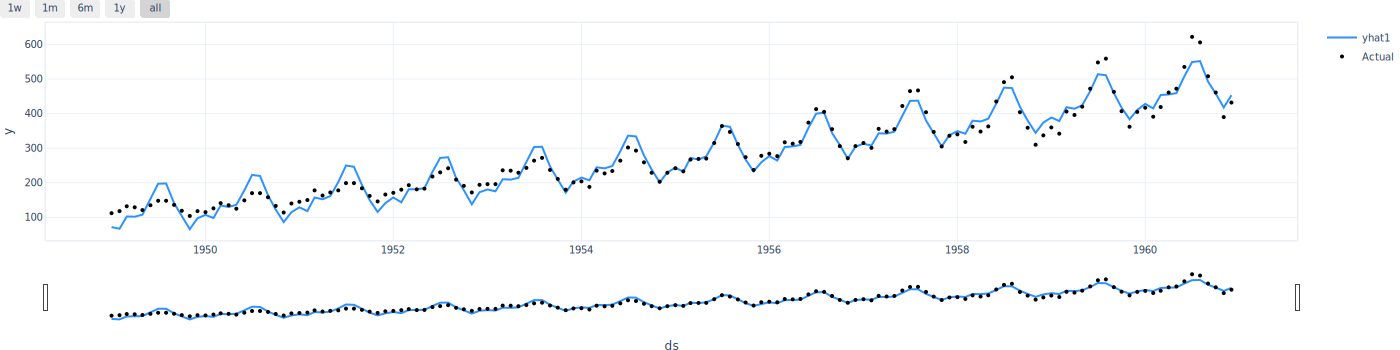

In [95]:
m1.plot(conformal_forecasts,plotting_backend="plotly-static",figsize=(20,5))

### **Train and Test sets**

In [111]:
m1 = NeuralProphet(learning_rate=0.01,seasonality_mode="multiplicative")
## train and test sets  
train_df , test_df = m1.split_df(df=dataset_df,freq="MS",valid_p=0.1)
## fit thhee model  
metrics_train = m1.fit(df=train_df,freq="MS")
## futre  
future = m1.make_future_dataframe(df=train_df,periods=12,n_historic_predictions=True)
## forecast  
forecast = m1.predict(future)
## metriics test  
metrics_test = m1.test(df=test_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.231]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.231]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.296]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [92.857]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008531111292541027    │
│          MAE_val          │     24.5059757232666      │
│         RMSE_val          │     25.76329803466797     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [112]:
## metrics train  
metrics_train.describe()

,MAE,RMSE,Loss,RegLoss,epoch
count,220.000000,220.000000,220.000000,220.0,220.000000
mean,74.124611,84.709481,0.126094,0.0,109.500000
std,158.746876,178.527077,0.318256,0.0,63.652704
min,8.029398,9.962613,0.001008,0.0,0.000000
25%,8.695285,10.839980,0.001113,0.0,54.750000
50%,9.303989,11.541163,0.001274,0.0,109.500000
75%,13.598684,17.131990,0.002520,0.0,164.250000
max,627.170227,708.667847,1.279198,0.0,219.000000


In [113]:
## metrics testt  
metrics_test.describe()

,MAE_val,RMSE_val,Loss_test,RegLoss_test
count,1.000000,1.000000,1.000000,1.0
mean,24.505976,25.763298,0.008531,0.0
std,NaN,NaN,NaN,NaN
min,24.505976,25.763298,0.008531,0.0
25%,24.505976,25.763298,0.008531,0.0
50%,24.505976,25.763298,0.008531,0.0
75%,24.505976,25.763298,0.008531,0.0
max,24.505976,25.763298,0.008531,0.0


### **Cross Validation**

In [115]:
### Crosss validation 
METRICS_TRAIN = ['MAE','RMSE']
METRICS_TEST = ['MAE_val','RMSE_val']
params = { 
    "seasonality_mode":"multiplicative","learning_rate":0.01
}
## creeating folds  
folds = NeuralProphet(**params).crossvalidation_split_df(df=dataset_df,freq="MS",k=5,fold_pct=0.2,fold_overlap_pct=0.5)


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.306]% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


In [116]:
## creating df  
metrics_train = pd.DataFrame(columns=METRICS_TRAIN)
metrics_test = pd.DataFrame(columns=METRICS_TEST)

In [119]:
## looping through  
for train_df , test_df in folds:  
    m = NeuralProphet(**params)
    ## set plotly static  
    m.set_plotting_backend(plotting_backend="plotly-static")
    ## train the model   
    train = m.fit(df=train_df,freq="MS")
    ## test 
    test = m.test(df=test_df)
    ## get the last rows  
    last_train = train[METRICS_TRAIN].iloc[-1]
    ##last test  
    last_test = test[METRICS_TEST].iloc[-1]
    ## append   
    metrics_train.loc[len(metrics_train)] = last_train
    metrics_test.loc[len(metrics_test)] = last_test

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.333]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 300


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.429]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.030239641666412354    │
│          MAE_val          │    15.041351318359375     │
│         RMSE_val          │     18.59517478942871     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.649]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 280


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.429]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.10023533552885056    │
│          MAE_val          │    36.554588317871094     │
│         RMSE_val          │     39.65339660644531     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.864]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 260


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.429]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.013472805730998516    │
│          MAE_val          │    12.595113754272461     │
│         RMSE_val          │     18.75957489013672     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.02]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 240


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.429]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.024807455018162727    │
│          MAE_val          │     26.37337303161621     │
│         RMSE_val          │    30.738386154174805     │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.138]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 230


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.429]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.00803594384342432    │
│          MAE_val          │    17.398536682128906     │
│         RMSE_val          │     21.6124210357666      │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [121]:
## prrint the metrics train and metris test 
metrics_train.describe()

,MAE,RMSE
count,10.000000,10.000000
mean,6.640168,8.307544
std,1.664316,2.044915
min,5.402629,6.554536
25%,5.759769,7.273293
50%,6.022976,7.648296
75%,6.425041,8.044299
max,10.585321,13.168402


In [122]:
## metrics test  
metrics_test.describe()

,MAE_val,RMSE_val
count,10.000000,10.000000
mean,21.666888,25.870155
std,9.474561,9.034495
min,12.595114,17.218691
25%,14.643353,18.636275
50%,16.219944,21.813121
75%,27.974416,32.446910
max,36.554588,39.653397


### **finalized Model**

In [127]:
## train and test sets  
train_data = dataset_df.iloc[:-12].copy()
## test  
test_data = dataset_df.iloc[-12:].copy()
## defining the events df  
new_year_event_df =  pd.DataFrame({  
    "Event":"New_year", 
    "ds":pd.date_range(start=dataset_df['ds'].min(),end=dataset_df['ds'].max(),freq="MS")
})



In [141]:
## defining a function 
def evaluate_full_model(model, name , train_data):  
    ## check if the model is prophet (classical) or NeuralProphet  
    if isinstance(model, Prophet): 
        ## fit thee model  
        model.fit(train_data)
        ### maake thee futuree dataframe   
        future = model.make_future_dataframe(periods=12,freq="MS")
        ## make thee forecast 
        forecast = model.predict(future)
        ## get the foreccast 
        forecast = forecast[['ds','yhat']].dropna()
        ## get the predictions  
        y_pred = forecast['yhat'].values[-12:]
    elif isinstance(model,NeuralProphet):
        ## fit the model 
        model.fit(df=train_data,freq="MS")
        ## make the future dataframe   
        future = model.make_future_dataframe(periods=12,n_historic_predictions=False,df=train_data)
        ## forecasts    
        forecast = model.predict(future)
        ## get ds and yhat1
        forecast = forecast.dropna(subset=['yhat1'])
        ## geet the y pred values  
        y_pred = forecast['yhat1'].values
    else:       
        raise ValueError("The Model Specificied is unsported : Please specify either prophet or NeuralProphet")
    
    ## specify the y_true 
    y_true   =   test_data['y'].values[-len(y_pred):]

    ## Define the Metrics  
    mae = mean_absolute_error(y_true , y_pred)
    mse = mean_squared_error(y_true , y_pred)
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100

    ### return  
    return [name,mae,mse,mape]
    # mape = mean_absolute_percentage_error(y_true , y_true)
    
## Define the Models  
## m1 
m1 = NeuralProphet(learning_rate=0.01)
## m2        
m2 = Prophet()
## m3  
m3 = Prophet( 
    changepoint_range=0.8, 
    changepoint_prior_scale=0.05, 
    seasonality_mode="multiplicative", 
    seasonality_prior_scale=10
)
## m4  
m4 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=False,  
    daily_seasonality=False, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    learning_rate=0.01,  
    quantiles=None, 
    drop_missing=True

)
### m5 
m5 = NeuralProphet( 
    yearly_seasonality=True, 
    weekly_seasonality=False,  
    daily_seasonality=False, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    learning_rate=0.01,  
    quantiles=None, 
    drop_missing=True, 
    n_lags=12,
    ar_layers=[32,16]

)
## m6  
m6 = NeuralProphet( 

    yearly_seasonality=True, 
    weekly_seasonality=False,  
    daily_seasonality=False, 
    seasonality_mode="multiplicative", 
    seasonality_reg=10, 
    learning_rate=0.01,  
    quantiles=None, 
    drop_missing=True, 
    n_lags=3,
    ar_layers = []
    
    

)
## train_m6 
train_m6 = train_data.copy()
## add new year to train m6 
train_m6['New_year'] = train['ds'].isin(new_year_event_df['ds']).astype(int)
## add it to m6 
m6 = m6.add_events('New_year')
## make future 
future_m6 = m6.make_future_dataframe(df=train_m6,periods=12,n_historic_predictions=True)
## add it to m6 future 
future_m6['New_year'] = future_m6['New_year'].isin(new_year_event_df['ds']).astype(int)
    
    
## results  
results = []
## append the model  
results.append(evaluate_full_model(m1,"m1 NeuralProphet Base",train_data))
## model 2  
results.append(evaluate_full_model(m2,"m2 Prophet Base",train_data))
## model 3  
results.append(evaluate_full_model(m3,"m3 Prophet Tunned",train_data))
## model 4  
results.append(evaluate_full_model(m4,"m4 NeuralProphet Tunned",train_data))
## modedl 5  
results.append(evaluate_full_model(m5,"m5 ,NeuralProphet AR-Net",train_data))
## model 6 
results.append(evaluate_full_model(m6,"m6 NeuralProphet AR Net + Events",train_m6))

results_df = pd.DataFrame(results,columns=["Model","MAE","MSE","MAPE(%)"])



    

INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.config.__post_init__) - Note: Fourier-based seasonality regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
WARNING - (NP.data.splitting._make_future_dataframe) - Future values not supplied for user specified events. All events being treated as not occurring in future
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequenc

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
13:23:13 - cmdstanpy - INFO - Chain [1] start processing
13:23:13 - cmdstanpy - INFO - Chain [1] done processing
13:23:13 - cmdstanpy - INFO - Chain [1] start processing
13:23:14 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 230


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [92.308]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [92.308]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 220


Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (NP.data.splitting._make_future_dataframe) - Future values not supplied for user specified events. All events being treated as not occurring in future
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [75.]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [75.]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end

Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [140]:
results_df

,Model,MAE,MSE,MAPE(%)
0,m1 NeuralProphet Base,30.277811,1519.109985,5.890925
1,m2 Prophet Base,33.435600,1854.935905,6.614262
2,m3 Prophet Tunned,21.898327,666.841459,4.441410
3,m4 NeuralProphet Tunned,23.864019,626.493713,5.131081
4,"m5 ,NeuralProphet AR-Net",24.605743,605.442627,5.695774
5,m6 NeuralProphet AR Net + Events,147.654053,21801.718750,34.179179
